In [1]:
def one_hot_label(img):
    label = img.split(".")[0]

    if "damage" in str(label):
        ohl = np.array([1,0])
            
    else:
        ohl = np.array([0,1])
        
    return ohl
        
def train_data_with_label():
    train_images = []
    for i in tqdm(os.listdir(train_data)):
        if i.startswith('.') == True:
            continue
        
        path = os.path.join(train_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256,256))
        train_images.append([np.array(img), one_hot_label(i)])
        
    shuffle(train_images)
    return train_images
        
def test_data_with_label():
    test_images = []
    for i in tqdm(os.listdir(test_data)):
        if i.startswith('.') == True:
            continue
            
        path = os.path.join(test_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256,256))
        test_images.append([np.array(img), one_hot_label(i)])
        
    return test_images

In [2]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *


%matplotlib inline

train_data = "../input/cnn/CNN/TRAIN/"
test_data = "../input/cnn/CNN/TEST/"


training_images = train_data_with_label()
testing_images = test_data_with_label()

tr_img_data = np.array([i[0] for i in training_images]).reshape(-1, 256,256,1)
tr_lbl_data = np.array([i[1] for i in training_images])

tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1, 256,256,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

Using TensorFlow backend.
100%|██████████| 56/56 [00:00<00:00, 202.60it/s]


In [3]:
model = Sequential()

model.add(InputLayer(input_shape=[256,256,1]))

model.add(Conv2D(filters=32, kernel_size=4, strides=1, padding="same", activation="sigmoid"))
model.add(MaxPool2D(pool_size=4, padding="same"))

model.add(Conv2D(filters=64, kernel_size=7, strides=1, padding="same", activation="sigmoid"))
model.add(MaxPool2D(pool_size=8, padding="same"))

model.add(Conv2D(filters=128, kernel_size=7, strides=1, padding="same", activation="sigmoid"))
model.add(MaxPool2D(pool_size=8, padding="same"))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="sigmoid"))
model.add(Dropout(rate=0.25))
model.add(Dense(2, activation="softmax"))
optimizer = Adam(lr=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
with tf.device('/gpu:0'):
    hist = model.fit(x=tr_img_data, y=tr_lbl_data, epochs=50, batch_size=100)
model.summary()



Epoch 1/50
31059/31059 [==============================] - 74s 2ms/step - loss: 0.6361 - acc: 0.6295
Epoch 2/50
31059/31059 [==============================] - 64s 2ms/step - loss: 0.4686 - acc: 0.7802
Epoch 3/50
31059/31059 [==============================] - 64s 2ms/step - loss: 0.4280 - acc: 0.8055
Epoch 4/50
31059/31059 [==============================] - 64s 2ms/step - loss: 0.4016 - acc: 0.8221
Epoch 5/50
31059/31059 [==============================] - 64s 2ms/step - loss: 0.3832 - acc: 0.8314
Epoch 6/50
31059/31059 [==============================] - 64s 2ms/step - loss: 0.3718 - acc: 0.8413
Epoch 7/50
31059/31059 [==============================] - 64s 2ms/step - loss: 0.3577 - acc: 0.8463
Epoch 8/50
31059/31059 [==============================] - 64s 2ms/step - loss: 0.3460 - acc: 0.8505
Epoch 9/50
31059/31059 [==============================] - 64s 2ms/step - loss: 0.3385 - acc: 0.8561
Epoch 10/50
31059/31059 [==============================] - 64s 2ms/step - loss: 0.3353 - acc: 0.8564

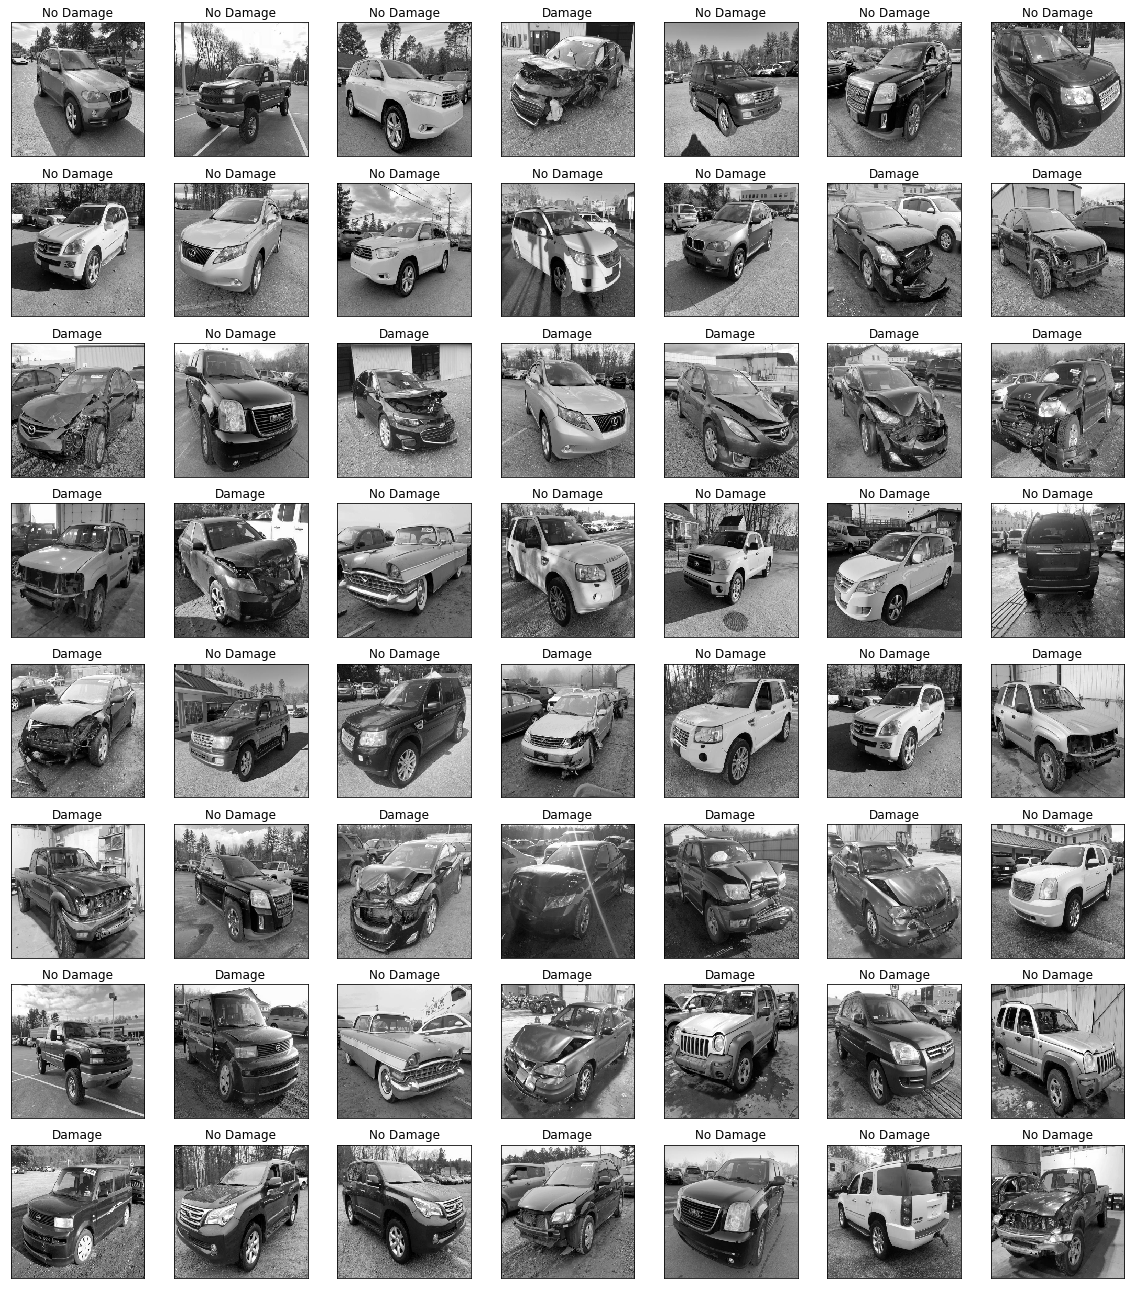

In [4]:
fig = plt.figure(figsize=(20,29))

for cnt,data in enumerate(testing_images):
    y = fig.add_subplot(10,7, cnt+1)
    
    img = data[0]
    data = img.reshape(1,256,256,1)
    model_out = model.predict([data])
    if np.argmax(model_out) == 1:
        str_label="No Damage"
    else:
        str_label ="Damage"
        
    y.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    plt.title(str_label)
    #print(np.round(model_out, 3), np.argmax(model_out))
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)